# 1) Download and read the dataset

In [ ]:
!wget http://qwone.com/~jason/20Newsgroups/20news-18828.tar.gz -P data/

In [ ]:
!tar -xzf data/20news-18828.tar.gz -C data/

In [1]:
!ls -l data/20news-18828/

total 0
drwxr-xr-x   801 naxty  staff  25632 Sep 26  2001 alt.atheism
drwxr-xr-x   975 naxty  staff  31200 Sep 26  2001 comp.graphics
drwxr-xr-x   987 naxty  staff  31584 Sep 26  2001 comp.os.ms-windows.misc
drwxr-xr-x   984 naxty  staff  31488 Sep 26  2001 comp.sys.ibm.pc.hardware
drwxr-xr-x   963 naxty  staff  30816 Sep 26  2001 comp.sys.mac.hardware
drwxr-xr-x   982 naxty  staff  31424 Sep 26  2001 comp.windows.x
drwxr-xr-x   974 naxty  staff  31168 Sep 26  2001 misc.forsale
drwxr-xr-x   992 naxty  staff  31744 Sep 26  2001 rec.autos
drwxr-xr-x   996 naxty  staff  31872 Sep 26  2001 rec.motorcycles
drwxr-xr-x   996 naxty  staff  31872 Sep 26  2001 rec.sport.baseball
drwxr-xr-x  1001 naxty  staff  32032 Sep 26  2001 rec.sport.hockey
drwxr-xr-x   993 naxty  staff  31776 Sep 26  2001 sci.crypt
drwxr-xr-x   983 naxty  staff  31456 Sep 26  2001 sci.electronics
drwxr-xr-x   992 naxty  staff  31744 Sep 26  2001 sci.med
drwxr-xr-x   989 naxty  staff  31648 Sep 26  2001 sci.space
drwxr-xr-x 

## Read texts

In [2]:
import os

In [3]:
def clean_text(text):
    text = text.lower() 
    import re
    # Remove punctuation characters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
    text = " ".join(text.split())
    return text

In [8]:
newsgroup_folder = "data/20news-18828/"
from os.path import isfile, join, isdir
import codecs
texts = []
for folder in os.listdir(newsgroup_folder):
    
    folder_path = join(newsgroup_folder, folder)
    if isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = join(folder_path, file)
            if isfile(file_path):
                text = codecs.open(file_path, "r", encoding='utf-8', errors='ignore').read()
                text = clean_text(text)
                texts.append({'text': text, 'label': folder})           

In [9]:
length_of_texts = [len(text['text']) for text in texts]

### Analysis length of texts

In [10]:
import seaborn as sns

/Users/naxty/miniconda3/envs/telekom/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


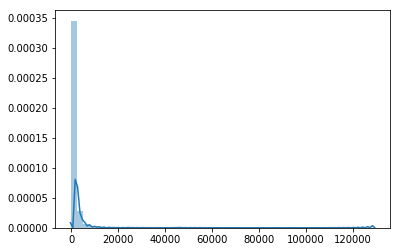

In [11]:
sns.distplot(length_of_texts)

Based on the distribution texts have a size < 5000:

In [12]:
import numpy as np

In [13]:
np.percentile(length_of_texts, 100)

128962.0

/Users/naxty/miniconda3/envs/telekom/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


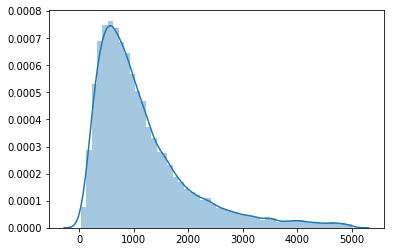

In [14]:
sns.distplot(list(filter(lambda x: x <5000, length_of_texts)))

At this point we want to filter out every text that is bigger than 1000

In [15]:
text_base = list(filter(lambda item: len(item['text']) < 1000, texts))

In [16]:
len(text_base)

10076

In [17]:
len(texts)-len(text_base)

8752

# Preparation for Machine Learning

In [18]:
X = [item['text'] for item in text_base]
y = [item['label'] for item in text_base]

In [19]:
len(X) == len(y)

True

# 2) Shuffle data and split into training and test

In [20]:
import sklearn
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 3) BAG representation

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB 
bag_text_clf = Pipeline([('vect', CountVectorizer(max_features=5000)),
                     ('clf', MultinomialNB()),
])

In [23]:
bag_text_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

# 4) TFIDF representation

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_text_clf = Pipeline([('tfidf', TfidfVectorizer(max_features=5000)),
                     ('clf', MultinomialNB()),
])

In [25]:
tfidf_text_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

# 5) Evaluation

In [26]:
from yellowbrick.classifier import ConfusionMatrix


## 5.1) BOW

In [27]:
y_pred_bag_ = bag_text_clf.predict(X_test)

In [28]:
sklearn.metrics.f1_score(y_test, y_pred_bag_, average="weighted")

0.8274417752980541

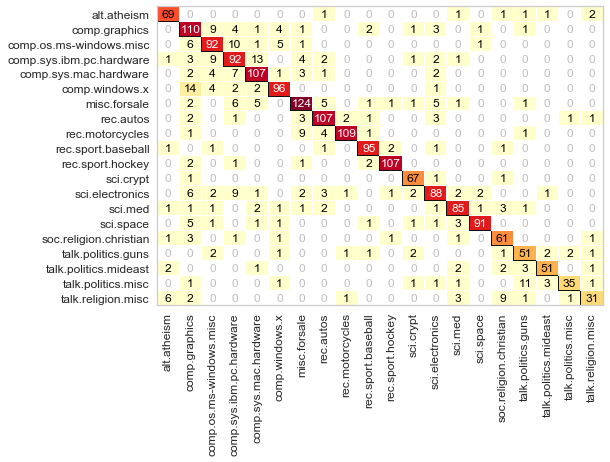

In [29]:
cm = ConfusionMatrix(bag_text_clf)
cm.score(X_test, y_test)

## 5.2) TFIDF

In [30]:
y_pred_tfidf_ = tfidf_text_clf.predict(X_test)

In [31]:
sklearn.metrics.f1_score(y_test, y_pred_tfidf_, average="weighted")

0.7851358605769314

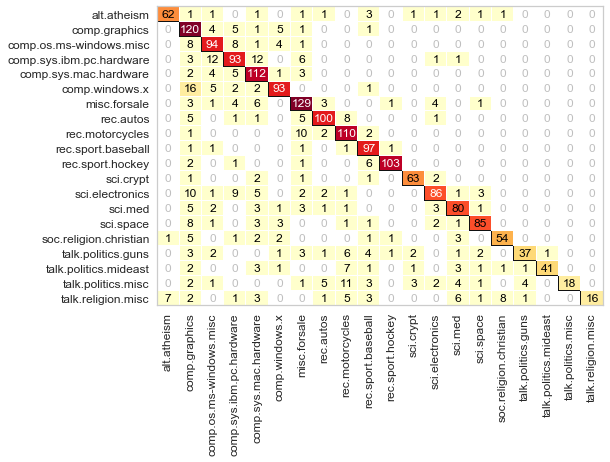

In [32]:
cm = ConfusionMatrix(tfidf_text_clf)
cm.score(X_test, y_test)